## Linear Regression

具有独立和同分布误差的线性模型，以及具有异方差或自相关误差的线性模型。该模块允许使用普通最小二乘(OLS)、加权最小二乘(WLS)、广义最小二乘(GLS)和具有自相关AR(p)误差的可行广义最小二乘进行估计。

In [1]:
import numpy as np
import statsmodels.api as sm

In [3]:
spector_data = sm.datasets.spector.load(as_pandas=False)

In [9]:
spector_data.exog[:2]

array([[ 2.66, 20.  ,  0.  ],
       [ 2.89, 22.  ,  0.  ]])

In [10]:
spector_data.raw_data[:2]

array([[ 2.66, 20.  ,  0.  ,  0.  ],
       [ 2.89, 22.  ,  0.  ,  0.  ]])

In [11]:
print(sm.add_constant.__doc__)


    Add a column of ones to an array.

    Parameters
    ----------
    data : array_like
        A column-ordered design matrix.
    prepend : bool
        If true, the constant is in the first column.  Else the constant is
        appended (last column).
    has_constant : str {'raise', 'add', 'skip'}
        Behavior if ``data`` already has a constant. The default will return
        data without adding another constant. If 'raise', will raise an
        error if any column has a constant value. Using 'add' will add a
        column of 1s if a constant column is present.

    Returns
    -------
    array_like
        The original values with a constant (column of ones) as the first or
        last column. Returned value type depends on input type.

    Notes
    -----
    When the input is recarray or a pandas Series or DataFrame, the added
    column's name is 'const'.
    


In [12]:
spector_data.exog = sm.add_constant(spector_data.exog,prepend=False)

In [13]:
spector_data.exog[:3]

array([[ 2.66, 20.  ,  0.  ,  1.  ],
       [ 2.89, 22.  ,  0.  ,  1.  ],
       [ 3.28, 24.  ,  0.  ,  1.  ]])

In [14]:
mod = sm.OLS(spector_data.endog,spector_data.exog)
res = mod.fit()

In [16]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Thu, 18 Jun 2020   Prob (F-statistic):            0.00157
Time:                        09:59:47   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

## 技术文档

假设统计模型为：

$Y = X\beta + \mu, where \mu~N(0,\sigma)$

根据Σ的性质,目前我们有四类:

 - GLS:任意的协方差Σ:广义最小二乘法

 - OLS:普通最小二乘法,Σ=I

 - WLS:加权最小二乘的异方差

 - GLSAR:自相关AR(p)误差的可行广义最小二乘Σ=Σ(ρ)

所有回归模型定义于相同的方法，遵循相同的结构，并且可以以类似的方式使用。其中一些包含附加的特定于模型的方法和属性。除了递归、滚动WLS和滚动OLS之外，GLS是其他回归类的超类。

下面是对所有回归类常见属性的详细描述:

In [20]:
mod.pinv_wexog # p x n 白色设计矩阵的Moore-Penrose伪逆
mod.df_model # 模型的自由度。这等于p - 1,其中p是回归量
mod.df_resid # 残差的自由度，这里等于 n - p,其中n是观测值p是参数的数量。
res.llf # 拟合模型的似然函数值。
res.nobs # 观测值n
res.normalized_cov_params # 标准化的协方差参数
mod.wexog # 权重外生变量
mod.wendog # 权重内生变量

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.])

### 普通最小二乘法回归 OLS

In [21]:
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [22]:
print(wls_prediction_std.__doc__) # 

calculate standard deviation and confidence interval for prediction

    applies to WLS and OLS, not to general GLS,
    that is independently but not identically distributed observations

    Parameters
    ----------
    res : regression result instance
        results of WLS or OLS regression required attributes see notes
    exog : array_like (optional)
        exogenous variables for points to predict
    weights : scalar or array_like (optional)
        weights as defined for WLS (inverse of variance of observation)
    alpha : float (default: alpha = 0.05)
        confidence level for two-sided hypothesis

    Returns
    -------
    predstd : array_like, 1d
        standard error of prediction
        same length as rows of exog
    interval_l, interval_u : array_like
        lower und upper confidence bounds

    Notes
    -----
    The result instance needs to have at least the following
    res.model.predict() : predicted values or
    res.fittedvalues : values used in estim

计算预测的标准差和置信区间

适用于WLS和OLS，不适用于一般的gl，这是独立的，但不是同分布的观测

OLS 估计

In [23]:
nsample = 100
x = np.linspace(0,10,nsample)
X = np.column_stack((x,x**2))

In [25]:
X = sm.add_constant(X)
beta = [1,0.1,10]
e = np.random.normal(nsample)

In [26]:
y = np.dot(X,beta) + e

In [32]:
mod = sm.OLS(y,X)
res = mod.fit()

In [33]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.733e+31
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:02:31   Log-Likelihood:                 2689.6
No. Observations:                 100   AIC:                            -5373.
Df Residuals:                      97   BIC:                            -5365.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.4182   1.51e-13    6.8e+14      0.0

In [34]:
print('PARAMS: ',res.params)
print('R2: ',res.rsquared)

PARAMS:  [1.02418204e+02 1.00000000e-01 1.00000000e+01]
R2:  1.0


**OLS曲线是非线性的，但在参数实现上是线性的**

In [35]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

In [47]:
y_true = np.dot(X,beta)
y = y_true + sig * np.random.randn(nsample)

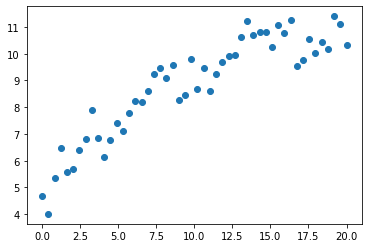

In [48]:
plt.plot(x,y,'o')

In [49]:
res = sm.OLS(y,X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     219.9
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           2.82e-27
Time:                        11:14:13   Log-Likelihood:                -34.647
No. Observations:                  50   AIC:                             77.29
Df Residuals:                      46   BIC:                             84.94
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4928      0.027     18.585      0.0

In [50]:
print('Prameters:',res.params)
print('Standard Error:',res.bse)
print('Predicted Value:',res.predict())

Prameters: [ 0.4928158   0.45808577 -0.01937944  5.02010931]
Standard Error: [0.0265167  0.10424027 0.00232819 0.17193529]
Predicted Value: [ 4.53562335  4.99446915  5.41698444  5.77820395  6.06217226  6.26456519
  6.39340029  6.46771956  6.51446094  6.5640324   6.64531609  6.78092303
  6.9834782   7.25354628  7.57953889  7.93961852  8.30528637  8.64606463
  8.93450389  9.150693    9.28553041  9.34221956  9.33574252  9.29039851
  9.23581159  9.20206352  9.21475142  9.2907822   9.43559485  9.64226679
  9.89265126 10.16035876 10.41509278 10.62762744 10.77460918 10.84239374
 10.82928784 10.74582738 10.61304643 10.45902139 10.31425812 10.20667991
 10.15703976 10.17551072 10.26001451 10.39656292 10.56155611 10.72565994
 10.85862548 10.93425888]


In [51]:
res.fittedvalues == res.predict()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

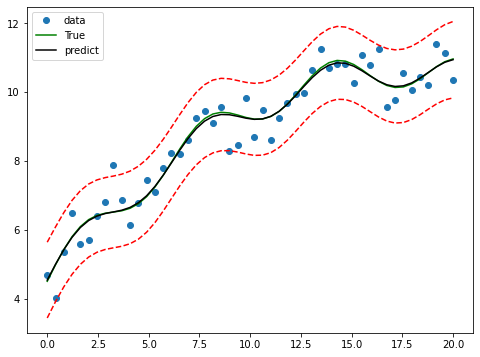

In [56]:
prstd,iv_l,iv_u = wls_prediction_std(res)
plt.figure(figsize=(8,6))
plt.plot(x,y,'o',label='data')
plt.plot(x,y_true,'g-',label='True')
plt.plot(x,res.fittedvalues,'k-',label='predict')
plt.plot(x,iv_l,'r--')
plt.plot(x,iv_u,'r--')
plt.legend(loc='best')

### 带有哑变量的OLS

我们产生一些人工数据。有三组将使用哑变量建模。第0组是基准类别。

In [58]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2

In [59]:
print(sm.categorical.__doc__)


    Construct a dummy matrix from categorical variables

    Parameters
    ----------
    data : array_like
        A structured array, recarray, array, Series or DataFrame.  This can be
        either a 1d vector of the categorical variable or a 2d array with
        the column specifying the categorical variable specified by the col
        argument.
    col : {str, int, None}
        If data is a DataFrame col must in a column of data. If data is a
        Series, col must be either the name of the Series or None. If data is a
        structured array or a recarray, `col` can be a string that is the name
        of the column that contains the variable.  For all other
        arrays `col` can be an int that is the (zero-based) column index
        number.  `col` can only be None for a 1d array.  The default is None.
    dictnames : bool, optional
        If True, a dictionary mapping the column number to the categorical
        name is returned.  Used to have information about pla

sm.categorical 从分类变量构造一个哑变量矩阵

In [60]:
dummy = sm.categorical(groups, drop=True)

In [61]:
dummy

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [70]:
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:,1:]))
X = sm.add_constant(X, prepend=False)

beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.randn(nsample)
y = y_true + e

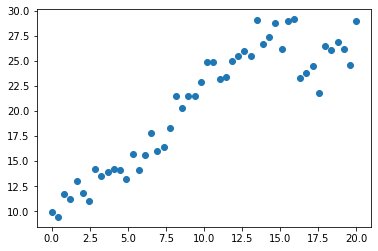

In [72]:
plt.plot(x,y,'o')

In [73]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     476.3
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           1.25e-34
Time:                        11:30:24   Log-Likelihood:                -74.587
No. Observations:                  50   AIC:                             157.2
Df Residuals:                      46   BIC:                             164.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0072      0.073     13.779      0.0

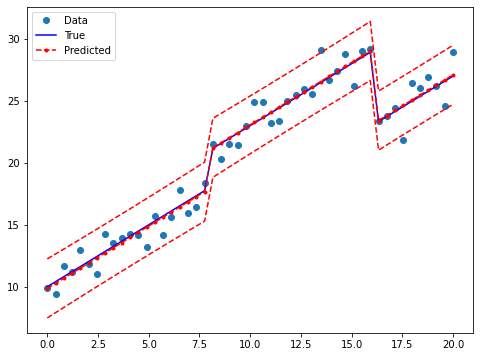

In [74]:

prstd, iv_l, iv_u = wls_prediction_std(res2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res2.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")

### 联合假设检验

我们想检验假设分类变量的两个系数都等于零，也就是说,R×β= 0。通过F检验，我们在3组中强烈拒绝相同常数的原假设:

In [84]:
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(np.array(R))
print(res2.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=array([[99.48804812]]), p=1.9660058436530386e-17, df_denom=46, df_num=2>


公式形式：

In [79]:
res2.f_test('x2 = x3 = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[99.48804812]]), p=1.9660058436529384e-17, df_denom=46, df_num=2>

In [81]:
res2.f_test('x2 = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[20.26028877]]), p=4.5866282723344e-05, df_denom=46, df_num=1>

In [85]:
print(res2.f_test.__doc__)


        Compute the F-test for a joint linear hypothesis.

        This is a special case of `wald_test` that always uses the F
        distribution.

        Parameters
        ----------
        r_matrix : {array_like, str, tuple}
            One of:

            - array : An r x k array where r is the number of restrictions to
              test and k is the number of regressors. It is assumed
              that the linear combination is equal to zero.
            - str : The full hypotheses to test can be given as a string.
              See the examples.
            - tuple : A tuple of arrays in the form (R, q), ``q`` can be
              either a scalar or a length k row vector.

        cov_p : array_like, optional
            An alternative estimate for the parameter covariance matrix.
            If None is given, self.normalized_cov_params is used.
        scale : float, optional
            Default is 1.0 for no scaling.

            .. deprecated:: 0.10.0

        invcov 

### 多重共线性

多重共线性：也就是说，外源性预测因子是高度相关的。这是有问题的，因为当我们对模型规格做微小的更改时，它会影响系数估计的稳定性。

In [86]:
from statsmodels.datasets.longley import load_pandas
y = load_pandas().endog
X = load_pandas().exog
X = sm.add_constant(X)

In [89]:
X

,const,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,1.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,1.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,1.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,1.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,1.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0
5,1.0,98.1,346999.0,1932.0,3594.0,113270.0,1952.0
6,1.0,99.0,365385.0,1870.0,3547.0,115094.0,1953.0
7,1.0,100.0,363112.0,3578.0,3350.0,116219.0,1954.0
8,1.0,101.2,397469.0,2904.0,3048.0,117388.0,1955.0
9,1.0,104.6,419180.0,2822.0,2857.0,118734.0,1956.0


In [90]:
ols_model = sm.OLS(y,X)
ols_res = ols_model.fit()
print(ols_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           4.98e-10
Time:                        14:29:53   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


评估多重共线性的一种方法是计算条件数。数值超过20就令人担忧了(见Greene 4.9)。第一步是对自变量进行归一化，使其具有单位长度:

In [99]:
norm_x = X.values
for i, name in enumerate(X):
    if name == "const":
        continue
    norm_x[:,i] = X[name]/np.linalg.norm(X[name])
norm_xtx = np.dot(norm_x.T,norm_x)

然后，我们取最大特征值与最小特征值之比的平方根。

In [100]:
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

56240.87037739987


格林还指出，放弃一个观测值会对系数估计产生戏剧性的影响:

In [102]:
ols_results2 = sm.OLS(y.iloc[:14], X.iloc[:14]).fit()
print("Percentage change %4.2f%%\n"*7 % tuple([i for i in (ols_results2.params - ols_res.params)/ols_res.params*100]))

Percentage change 4.55%
Percentage change -2228.01%
Percentage change 154304695.31%
Percentage change 1366329.02%
Percentage change 1112549.36%
Percentage change 92708715.91%
Percentage change 817944.26%



我们还可以查看一些正式的统计数据，比如DFBETAS——一种标准化的测量方法，用来测量当忽略观测值时，每个系数的变化程度。

In [107]:
ols_res.get_influence().summary_frame().filter(regex='dfb')

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\stats\outliers_influence.py:733: RuntimeWarning: inval

,dfb_const,dfb_GNPDEFL,dfb_GNP,dfb_UNEMP,dfb_ARMED,dfb_POP,dfb_YEAR
0,-0.016406,-169.822675,1.673981e+06,54490.318088,51447.824036,207954.113589,-31969.158503
1,-0.020608,-187.251727,1.829990e+06,54495.312977,52659.808664,25343.938290,-29760.155888
2,-0.008382,-65.417834,1.587601e+06,52002.330476,49078.352378,107465.770565,-29593.195253
3,0.018093,288.503914,1.155359e+06,56211.331922,60350.723082,456190.215133,-36213.129569
4,1.871260,-171.109595,4.498197e+06,82532.785818,71034.429294,-389122.401699,-49905.782854
5,-0.321373,-104.123822,1.398891e+06,52559.760056,47486.527649,144354.586054,-28985.057609
6,0.315945,-169.413317,2.364827e+06,59754.651394,50371.817827,-107413.074918,-32984.462465
7,0.015816,-69.343793,1.641243e+06,51849.056936,48628.749338,92843.959345,-29724.975873
8,-0.004019,-86.903523,1.649443e+06,52023.265116,49114.178265,83931.635336,-29563.619222
9,-1.018242,-201.315802,1.371257e+06,56432.027292,53997.742487,18392.575057,-29203.217108


一般来说，我们可以认为绝对值大于$2/\sqrt{N}$的DFBETAS是有影响的观测

计算VIF值，< 5 无明显共线性，> 5 & < 10共线性中等，>10共线性严重

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [130]:
for i in np.arange(7):
    print(i,variance_inflation_factor(X.values,i))

0 136497961.8994227
1 135.53243828002405
2 1788.5134827186532
3 33.61889059604986
4 3.588930193444588
5 399.1510223125613
6 758.9805974073082
